In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

path = '../dataset/iris.data'  # 数据文件路径

In [4]:
# # # 手写读取数据
# f = file(path)
# x = []
# y = []
# for d in f:
#     d = d.strip()
#     if d:
#         d = d.split(',')
#         y.append(d[-1])
#         x.append(map(float, d[:-1]))
# print '原始数据X：\n', x
# print '原始数据Y：\n', y
# x = np.array(x)
# print 'Numpy格式X：\n', x
# y = np.array(y)
# print 'Numpy格式Y - 1:\n', y
# y[y == 'Iris-setosa'] = 0
# y[y == 'Iris-versicolor'] = 1
# y[y == 'Iris-virginica'] = 2
# print 'Numpy格式Y - 2:\n', y
# y = y.astype(dtype=np.int)
# print 'Numpy格式Y - 3:\n', y
# print '\n\n============================================\n\n'

# # 使用sklearn的数据预处理
# df = pd.read_csv(path, header=None)
# x = df.values[:, :-1]
# y = df.values[:, -1]
# print x.shape
# print y.shape
# print 'x = \n', x
# print 'y = \n', y
# le = preprocessing.LabelEncoder()
# le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
# print le.classes_
# y = le.transform(y)
# print 'Last Version, y = \n', y

# def iris_type(s):
#     it = {'Iris-setosa': 0,
#           'Iris-versicolor': 1,
#           'Iris-virginica': 2}
#     return it[s]
#
# # 路径，浮点型数据，逗号分隔，第4列使用函数iris_type单独处理
# data = np.loadtxt(path, dtype=float, delimiter=',',
#                   converters={4: iris_type})

data = pd.read_csv(path, header=None)
data[4] = pd.Categorical(data[4]).codes
# iris_types = data[4].unique()
# print iris_types
# for i, type in enumerate(iris_types):
#     data.set_value(data[4] == type, 4, i)
x, y = np.split(data.values, (4,), axis=1)
# print 'x = \n', x
# print 'y = \n', y
# 仅使用前两列特征
x = x[:, :2]
lr = Pipeline([('sc', StandardScaler()),
               ('poly', PolynomialFeatures(degree=2)),
               ('clf', LogisticRegression())])
lr.fit(x, y.ravel())
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
print 'y_hat = \n', y_hat
print 'y_hat_prob = \n', y_hat_prob
print u'准确度：%.2f%%' % (100 * np.mean(y_hat == y.ravel()))

y_hat = 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  1.  2.  1.  2.  1.  2.  2.
  1.  1.  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  1.  2.  2.  2.  1.  2.
  2.  2.  1.  2.  2.  1.]
y_hat_prob = 
[[ 0.95636649  0.02229721  0.0213363 ]
 [ 0.82119058  0.13155022  0.0472592 ]
 [ 0.96345857  0.01847458  0.01806685]
 [ 0.96147219  0.01980621  0.0187216 ]
 [ 0.98137946  0.00731619  0.01130436]
 [ 0.97913929  0.00770426  0.01315644]
 [ 0.989982    0.0027725   0.0072455 ]
 [ 0.95288163  0.02514667  0.0219717 ]
 [ 0.95817553  0.02185834  0.01996613]
 [ 0.8803775   0

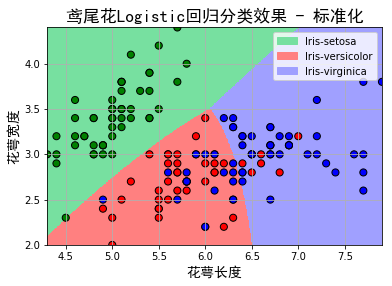

In [5]:
# 画图
N, M = 500, 500  # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

# # 无意义，只是为了凑另外两个维度
# x3 = np.ones(x1.size) * np.average(x[:, 2])
# x4 = np.ones(x1.size) * np.average(x[:, 3])
# x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  # 测试点

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)  # 预测值
y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本的显示
plt.xlabel(u'花萼长度', fontsize=14, fontproperties=fontproperties)
plt.ylabel(u'花萼宽度', fontsize=14, fontproperties=fontproperties)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
          mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
          mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
plt.legend(handles=patchs, fancybox=True, framealpha=0.8)
plt.title(u'鸢尾花Logistic回归分类效果 - 标准化', fontsize=17, fontproperties=fontproperties)
plt.show()